## [데이터 전처리]  ratiodata 만들기

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.utils import check_array
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score, r2_score
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.ensemble import RandomForestClassifier 
plt.style.use('seaborn') # 시각화 도구
sns.set(font_scale=2.5)

import missingno as msno

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [9]:
full = pd.read_csv("C:/Users/hello/Downloads/realdata.csv", encoding="utf-8")
full.head(10)

,date,sex,age,sm_cat,big_cat,qty,max_celsius,max_rain,min_celsius,mean_celsius,...,dry,heat,snow,storm,wind,cnt,tom_celsius,tom_rain,prior,event
0,2018-01-01,1,20,원두커피,식품,17,7.4,0.0,-12.9,-1.077381,...,1,0,0,0,1,5.530289,-0.48869,0.000992,0,0
1,2018-01-01,0,20,원두커피,식품,9,7.4,0.0,-12.9,-1.077381,...,1,0,0,0,1,5.530289,-0.48869,0.000992,0,0
2,2018-01-01,1,30,원두커피,식품,41,7.4,0.0,-12.9,-1.077381,...,1,0,0,0,1,5.530289,-0.48869,0.000992,0,0
3,2018-01-01,0,30,원두커피,식품,23,7.4,0.0,-12.9,-1.077381,...,1,0,0,0,1,5.530289,-0.48869,0.000992,0,0
4,2018-01-01,1,40,원두커피,식품,36,7.4,0.0,-12.9,-1.077381,...,1,0,0,0,1,5.530289,-0.48869,0.000992,0,0
5,2018-01-01,0,40,원두커피,식품,38,7.4,0.0,-12.9,-1.077381,...,1,0,0,0,1,5.530289,-0.48869,0.000992,0,0
6,2018-01-01,1,50,원두커피,식품,22,7.4,0.0,-12.9,-1.077381,...,1,0,0,0,1,5.530289,-0.48869,0.000992,0,0
7,2018-01-01,0,50,원두커피,식품,18,7.4,0.0,-12.9,-1.077381,...,1,0,0,0,1,5.530289,-0.48869,0.000992,0,0
8,2018-01-01,1,60,원두커피,식품,5,7.4,0.0,-12.9,-1.077381,...,1,0,0,0,1,5.530289,-0.48869,0.000992,0,0
9,2018-01-01,0,60,원두커피,식품,9,7.4,0.0,-12.9,-1.077381,...,1,0,0,0,1,5.530289,-0.48869,0.000992,0,0


In [10]:
full['index1']=full['date']+full['sm_cat']
full.head()

,date,sex,age,sm_cat,big_cat,qty,max_celsius,max_rain,min_celsius,mean_celsius,...,heat,snow,storm,wind,cnt,tom_celsius,tom_rain,prior,event,index1
0,2018-01-01,1,20,원두커피,식품,17,7.4,0.0,-12.9,-1.077381,...,0,0,0,1,5.530289,-0.48869,0.000992,0,0,2018-01-01원두커피
1,2018-01-01,0,20,원두커피,식품,9,7.4,0.0,-12.9,-1.077381,...,0,0,0,1,5.530289,-0.48869,0.000992,0,0,2018-01-01원두커피
2,2018-01-01,1,30,원두커피,식품,41,7.4,0.0,-12.9,-1.077381,...,0,0,0,1,5.530289,-0.48869,0.000992,0,0,2018-01-01원두커피
3,2018-01-01,0,30,원두커피,식품,23,7.4,0.0,-12.9,-1.077381,...,0,0,0,1,5.530289,-0.48869,0.000992,0,0,2018-01-01원두커피
4,2018-01-01,1,40,원두커피,식품,36,7.4,0.0,-12.9,-1.077381,...,0,0,0,1,5.530289,-0.48869,0.000992,0,0,2018-01-01원두커피


In [11]:
sum1=full['qty'].groupby(full['index1']).sum()

In [12]:
sum1=pd.DataFrame(sum1)
sum1.head()

,qty
index1,
2018-01-01감귤/한라봉/오렌지,883
2018-01-01더치커피,38
2018-01-01딸기/복분자/블루베리,107
2018-01-01수산 생물,271
2018-01-01오징어,58


In [13]:
sum1=sum1.rename(columns = {'qty' : 'sum'}, inplace = False)
sum1.head()

,sum
index1,
2018-01-01감귤/한라봉/오렌지,883
2018-01-01더치커피,38
2018-01-01딸기/복분자/블루베리,107
2018-01-01수산 생물,271
2018-01-01오징어,58


In [14]:
full1 = pd.merge(full, sum1, on='index1')
full1.tail(10)

,date,sex,age,sm_cat,big_cat,qty,max_celsius,max_rain,min_celsius,mean_celsius,...,snow,storm,wind,cnt,tom_celsius,tom_rain,prior,event,index1,sum
109490,2019-12-31,1,20,참외/메론/수박,식품,1,4.4,9.5,-16.3,-4.385098,...,1,0,1,35.560997,0.0,0.0,4,0,2019-12-31참외/메론/수박,23
109491,2019-12-31,0,20,참외/메론/수박,식품,0,4.4,9.5,-16.3,-4.385098,...,1,0,1,35.560997,0.0,0.0,0,0,2019-12-31참외/메론/수박,23
109492,2019-12-31,1,30,참외/메론/수박,식품,5,4.4,9.5,-16.3,-4.385098,...,1,0,1,35.560997,0.0,0.0,7,0,2019-12-31참외/메론/수박,23
109493,2019-12-31,0,30,참외/메론/수박,식품,1,4.4,9.5,-16.3,-4.385098,...,1,0,1,35.560997,0.0,0.0,2,0,2019-12-31참외/메론/수박,23
109494,2019-12-31,1,40,참외/메론/수박,식품,5,4.4,9.5,-16.3,-4.385098,...,1,0,1,35.560997,0.0,0.0,10,0,2019-12-31참외/메론/수박,23
109495,2019-12-31,0,40,참외/메론/수박,식품,6,4.4,9.5,-16.3,-4.385098,...,1,0,1,35.560997,0.0,0.0,3,0,2019-12-31참외/메론/수박,23
109496,2019-12-31,1,50,참외/메론/수박,식품,5,4.4,9.5,-16.3,-4.385098,...,1,0,1,35.560997,0.0,0.0,4,0,2019-12-31참외/메론/수박,23
109497,2019-12-31,0,50,참외/메론/수박,식품,0,4.4,9.5,-16.3,-4.385098,...,1,0,1,35.560997,0.0,0.0,1,0,2019-12-31참외/메론/수박,23
109498,2019-12-31,1,60,참외/메론/수박,식품,0,4.4,9.5,-16.3,-4.385098,...,1,0,1,35.560997,0.0,0.0,1,0,2019-12-31참외/메론/수박,23
109499,2019-12-31,0,60,참외/메론/수박,식품,0,4.4,9.5,-16.3,-4.385098,...,1,0,1,35.560997,0.0,0.0,0,0,2019-12-31참외/메론/수박,23


In [15]:
ratio=full1['qty']/full1['sum']
ratio=ratio.fillna(0)
ratio1=pd.DataFrame(ratio)
ratio1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109500 entries, 0 to 109499
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       109500 non-null  float64
dtypes: float64(1)
memory usage: 1.7 MB


In [16]:
ratio2 = np.array(ratio1)
shape = (10950, 10 )
ratio2=ratio2.reshape(shape )

In [17]:
ratio3=pd.DataFrame(ratio2)
ratio3.tail(20)

,0,1,2,3,4,5,6,7,8,9
10930,0.086957,0.043478,0.130435,0.086957,0.260870,0.130435,0.043478,0.130435,0.086957,0.000000
10931,0.250000,0.000000,0.250000,0.125000,0.000000,0.250000,0.000000,0.125000,0.000000,0.000000
10932,0.000000,0.055556,0.333333,0.111111,0.111111,0.166667,0.055556,0.166667,0.000000,0.000000
10933,0.000000,0.066667,0.200000,0.066667,0.333333,0.066667,0.000000,0.133333,0.066667,0.066667
10934,0.115385,0.038462,0.076923,0.192308,0.153846,0.230769,0.115385,0.038462,0.000000,0.038462
10935,0.250000,0.125000,0.125000,0.000000,0.208333,0.166667,0.000000,0.000000,0.041667,0.083333
10936,0.000000,0.047619,0.238095,0.000000,0.238095,0.238095,0.047619,0.190476,0.000000,0.000000
10937,0.050000,0.100000,0.300000,0.050000,0.150000,0.150000,0.100000,0.050000,0.050000,0.000000
10938,0.125000,0.000000,0.312500,0.062500,0.062500,0.062500,0.125000,0.250000,0.000000,0.000000
10939,0.071429,0.000000,0.071429,0.071429,0.571429,0.071429,0.071429,0.071429,0.000000,0.000000


In [18]:
ratio3.columns = ['F20', 'M20','F30','M30','F40','M40','F50','M50','F60','M60']
ratio3.head(20)

,F20,M20,F30,M30,F40,M40,F50,M50,F60,M60
0,0.077982,0.041284,0.188073,0.105505,0.165138,0.174312,0.100917,0.082569,0.022936,0.041284
1,0.080679,0.027601,0.180467,0.116773,0.178344,0.195329,0.055202,0.110403,0.021231,0.033970
2,0.079903,0.026634,0.176755,0.099274,0.237288,0.188862,0.075061,0.067797,0.019370,0.029056
3,0.080429,0.048257,0.241287,0.134048,0.174263,0.083110,0.093834,0.088472,0.010724,0.045576
4,0.075658,0.032895,0.223684,0.111842,0.200658,0.154605,0.078947,0.085526,0.013158,0.023026
5,0.123711,0.041237,0.175258,0.123711,0.216495,0.149485,0.067010,0.051546,0.025773,0.025773
6,0.068826,0.024291,0.198381,0.072874,0.279352,0.141700,0.085020,0.076923,0.016194,0.036437
7,0.101852,0.037037,0.196759,0.087963,0.238426,0.152778,0.076389,0.069444,0.013889,0.025463
8,0.080685,0.029340,0.200489,0.095355,0.224939,0.134474,0.066015,0.129584,0.026895,0.012225
9,0.055556,0.027778,0.172840,0.132716,0.194444,0.160494,0.083333,0.120370,0.018519,0.033951


In [19]:
is_1 = full['age'] == 20
new = full[is_1]# 조건를 충족하는 데이터를 필터링하여 새로운 변수에 저장

is_2= new['sex'] == 1
new = new[is_2]

new=new.drop(['sex','age','qty'],axis=1)
new.head()

,date,sm_cat,big_cat,max_celsius,max_rain,min_celsius,mean_celsius,mean_rain,max_wind,mean_wind,...,heat,snow,storm,wind,cnt,tom_celsius,tom_rain,prior,event,index1
0,2018-01-01,원두커피,식품,7.4,0.0,-12.9,-1.077381,0.000000,15.0,1.983678,...,0,0,0,1,5.530289,-0.488690,0.000992,0,0,2018-01-01원두커피
10,2018-01-02,원두커피,식품,9.3,0.5,-11.9,-0.488690,0.000992,19.2,1.979367,...,0,0,0,0,7.963932,-2.431548,0.005952,17,0,2018-01-02원두커피
20,2018-01-03,원두커피,식품,7.6,2.0,-12.9,-2.431548,0.005952,16.8,2.602568,...,0,1,0,0,8.888610,-2.470891,0.121782,38,0,2018-01-03원두커피
30,2018-01-04,원두커피,식품,6.9,7.0,-10.4,-2.470891,0.121782,14.9,1.778691,...,0,1,0,0,10.812019,-0.985149,0.212277,33,0,2018-01-04원두커피
40,2018-01-05,원두커피,식품,6.5,4.5,-9.9,-0.985149,0.212277,15.4,2.077772,...,0,1,0,1,7.051175,-1.494444,0.013889,30,0,2018-01-05원두커피


In [20]:
new=pd.merge(new, sum1, on="index1")
new=new.reset_index(drop=True)
new.head()

,date,sm_cat,big_cat,max_celsius,max_rain,min_celsius,mean_celsius,mean_rain,max_wind,mean_wind,...,snow,storm,wind,cnt,tom_celsius,tom_rain,prior,event,index1,sum
0,2018-01-01,원두커피,식품,7.4,0.0,-12.9,-1.077381,0.000000,15.0,1.983678,...,0,0,1,5.530289,-0.488690,0.000992,0,0,2018-01-01원두커피,218
1,2018-01-02,원두커피,식품,9.3,0.5,-11.9,-0.488690,0.000992,19.2,1.979367,...,0,0,0,7.963932,-2.431548,0.005952,17,0,2018-01-02원두커피,471
2,2018-01-03,원두커피,식품,7.6,2.0,-12.9,-2.431548,0.005952,16.8,2.602568,...,1,0,0,8.888610,-2.470891,0.121782,38,0,2018-01-03원두커피,413
3,2018-01-04,원두커피,식품,6.9,7.0,-10.4,-2.470891,0.121782,14.9,1.778691,...,1,0,0,10.812019,-0.985149,0.212277,33,0,2018-01-04원두커피,373
4,2018-01-05,원두커피,식품,6.5,4.5,-9.9,-0.985149,0.212277,15.4,2.077772,...,1,0,1,7.051175,-1.494444,0.013889,30,0,2018-01-05원두커피,304


In [21]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10950 entries, 0 to 10949
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          10950 non-null  object 
 1   sm_cat        10950 non-null  object 
 2   big_cat       10950 non-null  object 
 3   max_celsius   10950 non-null  float64
 4   max_rain      10950 non-null  float64
 5   min_celsius   10950 non-null  float64
 6   mean_celsius  10950 non-null  float64
 7   mean_rain     10950 non-null  float64
 8   max_wind      10950 non-null  float64
 9   mean_wind     10950 non-null  float64
 10  discom        10950 non-null  float64
 11  max_air       10950 non-null  float64
 12  mean_air      10950 non-null  float64
 13  min_air       10950 non-null  float64
 14  cold          10950 non-null  int64  
 15  dry           10950 non-null  int64  
 16  heat          10950 non-null  int64  
 17  snow          10950 non-null  int64  
 18  storm         10950 non-nu

In [22]:
full2 = pd.concat([new,ratio3], axis=1)
full2=full2.drop(['index1'], axis=1)
full2.head(15)

,date,sm_cat,big_cat,max_celsius,max_rain,min_celsius,mean_celsius,mean_rain,max_wind,mean_wind,...,F20,M20,F30,M30,F40,M40,F50,M50,F60,M60
0,2018-01-01,원두커피,식품,7.4,0.0,-12.9,-1.077381,0.000000,15.0,1.983678,...,0.077982,0.041284,0.188073,0.105505,0.165138,0.174312,0.100917,0.082569,0.022936,0.041284
1,2018-01-02,원두커피,식품,9.3,0.5,-11.9,-0.488690,0.000992,19.2,1.979367,...,0.080679,0.027601,0.180467,0.116773,0.178344,0.195329,0.055202,0.110403,0.021231,0.033970
2,2018-01-03,원두커피,식품,7.6,2.0,-12.9,-2.431548,0.005952,16.8,2.602568,...,0.079903,0.026634,0.176755,0.099274,0.237288,0.188862,0.075061,0.067797,0.019370,0.029056
3,2018-01-04,원두커피,식품,6.9,7.0,-10.4,-2.470891,0.121782,14.9,1.778691,...,0.080429,0.048257,0.241287,0.134048,0.174263,0.083110,0.093834,0.088472,0.010724,0.045576
4,2018-01-05,원두커피,식품,6.5,4.5,-9.9,-0.985149,0.212277,15.4,2.077772,...,0.075658,0.032895,0.223684,0.111842,0.200658,0.154605,0.078947,0.085526,0.013158,0.023026
5,2018-01-06,원두커피,식품,7.3,4.0,-11.5,-1.494444,0.013889,16.3,2.226915,...,0.123711,0.041237,0.175258,0.123711,0.216495,0.149485,0.067010,0.051546,0.025773,0.025773
6,2018-01-07,원두커피,식품,11.2,11.5,-7.3,-0.235714,0.767857,13.1,1.283926,...,0.068826,0.024291,0.198381,0.072874,0.279352,0.141700,0.085020,0.076923,0.016194,0.036437
7,2018-01-08,원두커피,식품,10.5,20.0,-8.1,2.124297,2.457430,23.3,2.257960,...,0.101852,0.037037,0.196759,0.087963,0.238426,0.152778,0.076389,0.069444,0.013889,0.025463
8,2018-01-09,원두커피,식품,6.4,14.5,-14.2,-1.979435,0.934879,23.8,3.922588,...,0.080685,0.029340,0.200489,0.095355,0.224939,0.134474,0.066015,0.129584,0.026895,0.012225
9,2018-01-10,원두커피,식품,4.2,26.5,-17.3,-5.137626,2.286519,23.6,3.421018,...,0.055556,0.027778,0.172840,0.132716,0.194444,0.160494,0.083333,0.120370,0.018519,0.033951


In [23]:
full2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10950 entries, 0 to 10949
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          10950 non-null  object 
 1   sm_cat        10950 non-null  object 
 2   big_cat       10950 non-null  object 
 3   max_celsius   10950 non-null  float64
 4   max_rain      10950 non-null  float64
 5   min_celsius   10950 non-null  float64
 6   mean_celsius  10950 non-null  float64
 7   mean_rain     10950 non-null  float64
 8   max_wind      10950 non-null  float64
 9   mean_wind     10950 non-null  float64
 10  discom        10950 non-null  float64
 11  max_air       10950 non-null  float64
 12  mean_air      10950 non-null  float64
 13  min_air       10950 non-null  float64
 14  cold          10950 non-null  int64  
 15  dry           10950 non-null  int64  
 16  heat          10950 non-null  int64  
 17  snow          10950 non-null  int64  
 18  storm         10950 non-nu

In [24]:
full2.to_csv("C:/Users/hello/Downloads/ratiodata1.csv", index=False)

## [제품 판매 수량 분석] LSTM

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [26]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i+look_back])
    return np.array(dataX), np.array(dataY)

In [27]:
np.random.seed(7)

data = pd.read_csv("C:/Users/hello/Downloads/finally.csv", encoding = 'cp949')
data = data.drop('big_cat', axis=1)
data.head()

,date,sm_cat,max_celsius,max_rain,min_celsius,mean_celsius,mean_rain,max_wind,mean_wind,discom,...,F40,M40,F50,M50,F60,M60,tom_max_celsius,tom_min_celsius,month,cnt_3days
0,2018-01-01,가공란,7.4,0.0,-12.9,-1.077381,0.000000,15.0,1.983678,37.160087,...,0.100000,0.066667,0.033333,0.000000,0.000000,0.000000,9.3,-11.9,1,0.480964
1,2018-01-02,가공란,9.3,0.5,-11.9,-0.488690,0.000992,19.2,1.979367,37.033879,...,0.151515,0.075758,0.015152,0.030303,0.007576,0.000000,7.6,-12.9,1,0.939262
2,2018-01-03,가공란,7.6,2.0,-12.9,-2.431548,0.005952,16.8,2.602568,35.592564,...,0.132743,0.053097,0.044248,0.008850,0.008850,0.000000,6.9,-10.4,1,1.153020
3,2018-01-04,가공란,6.9,7.0,-10.4,-2.470891,0.121782,14.9,1.778691,34.443450,...,0.147059,0.068627,0.068627,0.039216,0.019608,0.000000,6.5,-9.9,1,1.345567
4,2018-01-05,가공란,6.5,4.5,-9.9,-0.985149,0.212277,15.4,2.077772,35.664738,...,0.179775,0.044944,0.078652,0.011236,0.011236,0.011236,7.3,-11.5,1,1.390271


In [28]:
sm_cat = ['과일채소 분말/분태', '유자차', '마/야콘', '옥수수', '딸기/복분자/블루베리', '오징어', '절임배추/김치속', '굴 생물', '미나리', '참외/메론/수박', '감귤/한라봉/오렌지', '코코아/핫초코', '이온음료', '수산 생물']

result = []

In [29]:
for i in sm_cat:
    data1 = data[data['sm_cat']==i]
    data1 = data1.drop(['sm_cat', 'date'], axis=1)
    
    nparr = data1['sum'].values[::-1]
    nparr.astype('float32')
    
    scaler = MinMaxScaler(feature_range=(0,1))
    nptf = scaler.fit_transform(nparr.reshape(-1,1))
    
    train_size = int(len(nptf)*0.7)
    test_size = len(nptf)-train_size
    train, test = nptf[0:train_size,:], nptf[train_size:len(nptf),:]
    
    look_back=1
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    
    model = Sequential()
    model.add(LSTM(4, input_dim = look_back))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs = 100, batch_size = 5, verbose=2)
    
    testPredict = model.predict(testX)
    testPredict_inverse = scaler.inverse_transform(testPredict)
    
    testY_inverse = scaler.inverse_transform(testY)
    
    testScore = math.sqrt(mean_squared_error(testY_inverse, testPredict_inverse))
    result.append(testScore)

Epoch 1/100
102/102 - 0s - loss: 0.0358
Epoch 2/100
102/102 - 0s - loss: 0.0308
Epoch 3/100
102/102 - 0s - loss: 0.0305
Epoch 4/100
102/102 - 0s - loss: 0.0305
Epoch 5/100
102/102 - 0s - loss: 0.0305
Epoch 6/100
102/102 - 0s - loss: 0.0304
Epoch 7/100
102/102 - 0s - loss: 0.0304
Epoch 8/100
102/102 - 0s - loss: 0.0304
Epoch 9/100
102/102 - 0s - loss: 0.0304
Epoch 10/100
102/102 - 0s - loss: 0.0304
Epoch 11/100
102/102 - 0s - loss: 0.0303
Epoch 12/100
102/102 - 0s - loss: 0.0303
Epoch 13/100
102/102 - 0s - loss: 0.0303
Epoch 14/100
102/102 - 0s - loss: 0.0303
Epoch 15/100
102/102 - 0s - loss: 0.0303
Epoch 16/100
102/102 - 0s - loss: 0.0303
Epoch 17/100
102/102 - 0s - loss: 0.0303
Epoch 18/100
102/102 - 0s - loss: 0.0305
Epoch 19/100
102/102 - 0s - loss: 0.0306
Epoch 20/100
102/102 - 0s - loss: 0.0303
Epoch 21/100
102/102 - 0s - loss: 0.0304
Epoch 22/100
102/102 - 0s - loss: 0.0303
Epoch 23/100
102/102 - 0s - loss: 0.0303
Epoch 24/100
102/102 - 0s - loss: 0.0304
Epoch 25/100
102/102 - 0s

102/102 - 0s - loss: 0.0143
Epoch 2/100
102/102 - 0s - loss: 0.0119
Epoch 3/100
102/102 - 0s - loss: 0.0118
Epoch 4/100
102/102 - 0s - loss: 0.0116
Epoch 5/100
102/102 - 0s - loss: 0.0115
Epoch 6/100
102/102 - 0s - loss: 0.0114
Epoch 7/100
102/102 - 0s - loss: 0.0114
Epoch 8/100
102/102 - 0s - loss: 0.0113
Epoch 9/100
102/102 - 0s - loss: 0.0113
Epoch 10/100
102/102 - 0s - loss: 0.0113
Epoch 11/100
102/102 - 0s - loss: 0.0112
Epoch 12/100
102/102 - 0s - loss: 0.0112
Epoch 13/100
102/102 - 0s - loss: 0.0112
Epoch 14/100
102/102 - 0s - loss: 0.0112
Epoch 15/100
102/102 - 0s - loss: 0.0112
Epoch 16/100
102/102 - 0s - loss: 0.0112
Epoch 17/100
102/102 - 0s - loss: 0.0112
Epoch 18/100
102/102 - 0s - loss: 0.0111
Epoch 19/100
102/102 - 0s - loss: 0.0111
Epoch 20/100
102/102 - 0s - loss: 0.0111
Epoch 21/100
102/102 - 0s - loss: 0.0111
Epoch 22/100
102/102 - 0s - loss: 0.0111
Epoch 23/100
102/102 - 0s - loss: 0.0111
Epoch 24/100
102/102 - 0s - loss: 0.0111
Epoch 25/100
102/102 - 0s - loss: 0.0

Epoch 2/100
102/102 - 0s - loss: 0.0538
Epoch 3/100
102/102 - 0s - loss: 0.0322
Epoch 4/100
102/102 - 0s - loss: 0.0282
Epoch 5/100
102/102 - 0s - loss: 0.0261
Epoch 6/100
102/102 - 0s - loss: 0.0241
Epoch 7/100
102/102 - 0s - loss: 0.0222
Epoch 8/100
102/102 - 0s - loss: 0.0203
Epoch 9/100
102/102 - 0s - loss: 0.0186
Epoch 10/100
102/102 - 0s - loss: 0.0171
Epoch 11/100
102/102 - 0s - loss: 0.0159
Epoch 12/100
102/102 - 0s - loss: 0.0149
Epoch 13/100
102/102 - 0s - loss: 0.0141
Epoch 14/100
102/102 - 0s - loss: 0.0135
Epoch 15/100
102/102 - 0s - loss: 0.0132
Epoch 16/100
102/102 - 0s - loss: 0.0129
Epoch 17/100
102/102 - 0s - loss: 0.0128
Epoch 18/100
102/102 - 0s - loss: 0.0126
Epoch 19/100
102/102 - 0s - loss: 0.0126
Epoch 20/100
102/102 - 0s - loss: 0.0126
Epoch 21/100
102/102 - 0s - loss: 0.0126
Epoch 22/100
102/102 - 0s - loss: 0.0125
Epoch 23/100
102/102 - 0s - loss: 0.0125
Epoch 24/100
102/102 - 0s - loss: 0.0124
Epoch 25/100
102/102 - 0s - loss: 0.0124
Epoch 26/100
102/102 - 0

Epoch 3/100
102/102 - 0s - loss: 0.0256
Epoch 4/100
102/102 - 0s - loss: 0.0200
Epoch 5/100
102/102 - 0s - loss: 0.0146
Epoch 6/100
102/102 - 0s - loss: 0.0101
Epoch 7/100
102/102 - 0s - loss: 0.0071
Epoch 8/100
102/102 - 0s - loss: 0.0058
Epoch 9/100
102/102 - 0s - loss: 0.0051
Epoch 10/100
102/102 - 0s - loss: 0.0049
Epoch 11/100
102/102 - 0s - loss: 0.0048
Epoch 12/100
102/102 - 0s - loss: 0.0048
Epoch 13/100
102/102 - 0s - loss: 0.0048
Epoch 14/100
102/102 - 0s - loss: 0.0048
Epoch 15/100
102/102 - 0s - loss: 0.0048
Epoch 16/100
102/102 - 0s - loss: 0.0047
Epoch 17/100
102/102 - 0s - loss: 0.0047
Epoch 18/100
102/102 - 0s - loss: 0.0047
Epoch 19/100
102/102 - 0s - loss: 0.0047
Epoch 20/100
102/102 - 0s - loss: 0.0047
Epoch 21/100
102/102 - 0s - loss: 0.0046
Epoch 22/100
102/102 - 0s - loss: 0.0046
Epoch 23/100
102/102 - 0s - loss: 0.0046
Epoch 24/100
102/102 - 0s - loss: 0.0046
Epoch 25/100
102/102 - 0s - loss: 0.0046
Epoch 26/100
102/102 - 0s - loss: 0.0045
Epoch 27/100
102/102 - 

102/102 - 0s - loss: 0.0075
Epoch 4/100
102/102 - 0s - loss: 0.0070
Epoch 5/100
102/102 - 0s - loss: 0.0066
Epoch 6/100
102/102 - 0s - loss: 0.0062
Epoch 7/100
102/102 - 0s - loss: 0.0061
Epoch 8/100
102/102 - 0s - loss: 0.0060
Epoch 9/100
102/102 - 0s - loss: 0.0059
Epoch 10/100
102/102 - 0s - loss: 0.0058
Epoch 11/100
102/102 - 0s - loss: 0.0058
Epoch 12/100
102/102 - 0s - loss: 0.0058
Epoch 13/100
102/102 - 0s - loss: 0.0057
Epoch 14/100
102/102 - 0s - loss: 0.0057
Epoch 15/100
102/102 - 0s - loss: 0.0058
Epoch 16/100
102/102 - 0s - loss: 0.0057
Epoch 17/100
102/102 - 0s - loss: 0.0058
Epoch 18/100
102/102 - 0s - loss: 0.0057
Epoch 19/100
102/102 - 0s - loss: 0.0057
Epoch 20/100
102/102 - 0s - loss: 0.0057
Epoch 21/100
102/102 - 0s - loss: 0.0057
Epoch 22/100
102/102 - 0s - loss: 0.0057
Epoch 23/100
102/102 - 0s - loss: 0.0057
Epoch 24/100
102/102 - 0s - loss: 0.0056
Epoch 25/100
102/102 - 0s - loss: 0.0057
Epoch 26/100
102/102 - 0s - loss: 0.0057
Epoch 27/100
102/102 - 0s - loss: 0

Epoch 4/100
102/102 - 0s - loss: 0.0148
Epoch 5/100
102/102 - 0s - loss: 0.0136
Epoch 6/100
102/102 - 0s - loss: 0.0124
Epoch 7/100
102/102 - 0s - loss: 0.0112
Epoch 8/100
102/102 - 0s - loss: 0.0101
Epoch 9/100
102/102 - 0s - loss: 0.0091
Epoch 10/100
102/102 - 0s - loss: 0.0082
Epoch 11/100
102/102 - 0s - loss: 0.0075
Epoch 12/100
102/102 - 0s - loss: 0.0070
Epoch 13/100
102/102 - 0s - loss: 0.0066
Epoch 14/100
102/102 - 0s - loss: 0.0064
Epoch 15/100
102/102 - 0s - loss: 0.0062
Epoch 16/100
102/102 - 0s - loss: 0.0062
Epoch 17/100
102/102 - 0s - loss: 0.0061
Epoch 18/100
102/102 - 0s - loss: 0.0061
Epoch 19/100
102/102 - 0s - loss: 0.0060
Epoch 20/100
102/102 - 0s - loss: 0.0060
Epoch 21/100
102/102 - 0s - loss: 0.0060
Epoch 22/100
102/102 - 0s - loss: 0.0060
Epoch 23/100
102/102 - 0s - loss: 0.0060
Epoch 24/100
102/102 - 0s - loss: 0.0060
Epoch 25/100
102/102 - 0s - loss: 0.0060
Epoch 26/100
102/102 - 0s - loss: 0.0060
Epoch 27/100
102/102 - 0s - loss: 0.0060
Epoch 28/100
102/102 -

102/102 - 0s - loss: 0.0126
Epoch 5/100
102/102 - 0s - loss: 0.0119
Epoch 6/100
102/102 - 0s - loss: 0.0112
Epoch 7/100
102/102 - 0s - loss: 0.0106
Epoch 8/100
102/102 - 0s - loss: 0.0099
Epoch 9/100
102/102 - 0s - loss: 0.0093
Epoch 10/100
102/102 - 0s - loss: 0.0087
Epoch 11/100
102/102 - 0s - loss: 0.0081
Epoch 12/100
102/102 - 0s - loss: 0.0077
Epoch 13/100
102/102 - 0s - loss: 0.0074
Epoch 14/100
102/102 - 0s - loss: 0.0071
Epoch 15/100
102/102 - 0s - loss: 0.0068
Epoch 16/100
102/102 - 0s - loss: 0.0067
Epoch 17/100
102/102 - 0s - loss: 0.0066
Epoch 18/100
102/102 - 0s - loss: 0.0065
Epoch 19/100
102/102 - 0s - loss: 0.0065
Epoch 20/100
102/102 - 0s - loss: 0.0064
Epoch 21/100
102/102 - 0s - loss: 0.0064
Epoch 22/100
102/102 - 0s - loss: 0.0064
Epoch 23/100
102/102 - 0s - loss: 0.0064
Epoch 24/100
102/102 - 0s - loss: 0.0064
Epoch 25/100
102/102 - 0s - loss: 0.0064
Epoch 26/100
102/102 - 0s - loss: 0.0063
Epoch 27/100
102/102 - 0s - loss: 0.0064
Epoch 28/100
102/102 - 0s - loss: 

In [ ]:
print(result)

## [제품 판매 수량 분석] SVM

In [ ]:
data = pd.read_csv("C:/Users/hello/Downloads/final_full_data.csv", encoding = 'cp949')
data = data.drop('big_cat', axis=1)

In [ ]:
sm_cat = ['과일채소 분말/분태', '유자차', '마/야콘', '옥수수', '딸기/복분자/블루베리', '오징어', '절임배추/김치속', '굴 생물', '미나리', '참외/메론/수박', '감귤/한라봉/오렌지', '코코아/핫초코', '이온음료', '수산 생물']
result = []

In [ ]:
svm = SVC(kernel='linear', C=1.0, random_state=0)

In [ ]:
for i in sm_cat:
    data1 = data[data['sm_cat']==i]
    data1 = data1.drop(['sm_cat', 'date'], axis=1)
    
    train, test = train_test_split(data1, test_size = 0.3, shuffle = False, random_state = 10)
    
    x_train = train.drop('sum', axis =1)
    y_train = train['sum']
    x_test = test.drop('sum', axis=1)
    y_test = test['sum']
    
    svm.fit(x_train, y_train)
    
    svm_pred = svm.predict(x_test)
    RMSE = mean_squared_error(y_test, svm_pred)
    result.append(np.sqrt(RMSE))

In [ ]:
print(result)

## [제품 판매 수량 분석] Random Forest

In [34]:
data = pd.read_csv("C:/Users/hello/Downloads/finally.csv", encoding="CP949")
data.head()

,date,sm_cat,big_cat,max_celsius,max_rain,min_celsius,mean_celsius,mean_rain,max_wind,mean_wind,...,F40,M40,F50,M50,F60,M60,tom_max_celsius,tom_min_celsius,month,cnt_3days
0,2018-01-01,가공란,식품,7.4,0.0,-12.9,-1.077381,0.000000,15.0,1.983678,...,0.100000,0.066667,0.033333,0.000000,0.000000,0.000000,9.3,-11.9,1,0.480964
1,2018-01-02,가공란,식품,9.3,0.5,-11.9,-0.488690,0.000992,19.2,1.979367,...,0.151515,0.075758,0.015152,0.030303,0.007576,0.000000,7.6,-12.9,1,0.939262
2,2018-01-03,가공란,식품,7.6,2.0,-12.9,-2.431548,0.005952,16.8,2.602568,...,0.132743,0.053097,0.044248,0.008850,0.008850,0.000000,6.9,-10.4,1,1.153020
3,2018-01-04,가공란,식품,6.9,7.0,-10.4,-2.470891,0.121782,14.9,1.778691,...,0.147059,0.068627,0.068627,0.039216,0.019608,0.000000,6.5,-9.9,1,1.345567
4,2018-01-05,가공란,식품,6.5,4.5,-9.9,-0.985149,0.212277,15.4,2.077772,...,0.179775,0.044944,0.078652,0.011236,0.011236,0.011236,7.3,-11.5,1,1.390271


In [51]:
data1 = data.drop(['date','big_cat'],axis=1)
catlist = ['과일채소 분말/분태','유자차','마/야콘','옥수수','딸기/복분자/블루베리','오징어','절임배추/김치속','굴 생물','미나리','참외/메론/수박','감귤/한라봉/오렌지','코코아/핫초코','이온음료','수산 생물']

In [55]:
for cat in catlist : 
    fruit = data1[data1['sm_cat']==cat]
    fruit = fruit.drop(['sm_cat','cnt_3days'], axis=1)
    fruit = fruit.reset_index(drop=True)
    
    # 테스트 데이터 30
    train, test = train_test_split(fruit, test_size=0.3) 
    x_train = train.drop('sum', axis= 1)
    y_train = train['sum']
    x_test = test.drop('sum', axis=1)
    y_test = test['sum']
    
    forest = RandomForestClassifier(n_estimators=500,  random_state=1, n_jobs=-1)
    forest.fit(x_train, y_train)
    
    y_pred = forest.predict(x_test)
    
    # 정확도 확인
    RMSE = mean_squared_error(y_test, y_pred) 
    print(cat,'RMSE : ',np.sqrt(RMSE))
    print(cat, 'Mean : ',data[data['sm_cat']==cat]['cnt'].mean())

과일채소 분말/분태 RMSE :  0.42199785755477703
과일채소 분말/분태 Mean :  0.06751073561643836
유자차 RMSE :  31.74153610264083
유자차 Mean :  7.958725452054795
마/야콘 RMSE :  0.7022468831767834
마/야콘 Mean :  382.6836765753424
옥수수 RMSE :  96.0606496013143
옥수수 Mean :  89.00621354794521
딸기/복분자/블루베리 RMSE :  38.135542931800465
딸기/복분자/블루베리 Mean :  433.37804684931507
오징어 RMSE :  50.665344851779814
오징어 Mean :  140.55737639726027
절임배추/김치속 RMSE :  81.42932616580683
절임배추/김치속 Mean :  3.4376722410958904
굴 생물 RMSE :  51.66886134681808
굴 생물 Mean :  59.351427342465755
미나리 RMSE :  6.247922028992143
미나리 Mean :  22.950166452054795
참외/메론/수박 RMSE :  110.45894297064308
참외/메론/수박 Mean :  126.86859678082193
감귤/한라봉/오렌지 RMSE :  376.9139104496025
감귤/한라봉/오렌지 Mean :  189.78601178082192
코코아/핫초코 RMSE :  33.7183472406236
코코아/핫초코 Mean :  33.8075562739726
이온음료 RMSE :  42.20914441381297
이온음료 Mean :  3.1898333315068492
수산 생물 RMSE :  133.6432585203803
수산 생물 Mean :  0.9865091698630137


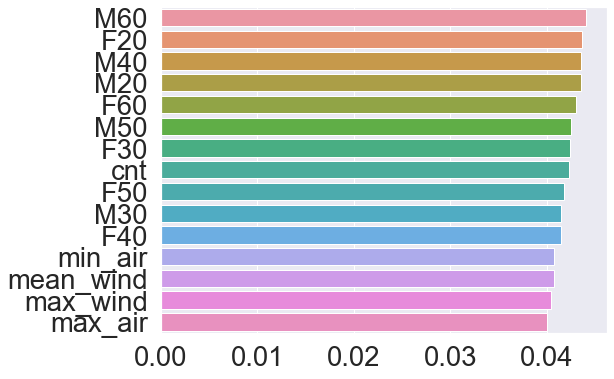

In [56]:
# Importance Plot
ftr_importances_values = forest.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=x_train.columns  )
ftr_top15 = ftr_importances.sort_values(ascending=False)[:15]

plt.figure(figsize=(8,6))
sns.barplot(x=ftr_top15 , y = ftr_top15.index)
plt.show()

## [제품 판매 수량 분석] XGboost

In [46]:
catlist = ['과일채소 분말/분태','유자차','마/야콘','옥수수','딸기/복분자/블루베리','오징어','절임배추/김치속','굴 생물','미나리','참외/메론/수박','감귤/한라봉/오렌지','코코아/핫초코','이온음료','수산 생물']

In [49]:
for cat in catlist :
    sm = data1[data1['sm_cat']==cat]
    sm = sm.drop('sm_cat', axis=1)
    sm = sm.reset_index(drop=True)
    
    # 테스트 데이터 30%
    train, test = train_test_split(sm, test_size=0.3)
    
    x_train = train.drop('sum', axis=1)
    y_train = train['sum']
    x_test = test.drop('sum', axis=1)
    y_test = test['sum']
    
    # parameter
    param = {
        'max_depth': 3,  # the maximum depth of each tree 
        'eta': 0.3,  # the training step for each iteration 
        'min_child_weight' : 0.0
    }
    
    num_round=20 # the number of training iterations 
    
    model = XGBClassifier(param)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    
    RMSE = mean_squared_error(y_test, y_pred) 
    print(cat,np.sqrt(RMSE))# RMSE 값
    
    plt.figure(figsize=(40,20))
    plot_importance(model,max_num_features=20)
    plt.rcParams["figure.figsize"] = (20,15)
    plt.show()

[16:34:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
과일채소 분말/분태 0.39977162430339336 7.941176470588235
[16:34:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
유자차 31.734558320241703 48.60338460290017
[16:34:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to res

## [제품 sns 언급량 예측] XGboost

In [50]:
catlist = ['과일채소 분말/분태','유자차','마/야콘','옥수수','딸기/복분자/블루베리','오징어','절임배추/김치속','굴 생물','미나리','참외/메론/수박','감귤/한라봉/오렌지','코코아/핫초코','이온음료','수산 생물']

In [ ]:
for cat in catlist :
    sm = data1[data1['sm_cat']==cat]
    sm = sm.drop(['sm_cat', 'sum'], axis=1)
    sm = sm.reset_index(drop=True)
    
    # 테스트 데이터 30%
    train, test = train_test_split(sm, test_size=0.3)
    
    x_train = train.drop('cnt', axis=1)
    y_train = train['cnt']
    x_test = test.drop('cnt', axis=1)
    y_test = test['cnt']
    
    # parameter
    param = {
        'max_depth': 3,  # the maximum depth of each tree 
        'eta': 0.3,  # the training step for each iteration 
        'min_child_weight' : 0.0
    }
    
    num_round=20 # the number of training iterations 
    
    model = XGBClassifier(param)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    
    RMSE = mean_squared_error(y_test, y_pred) 
    print(cat,np.sqrt(RMSE))# RMSE 값
    
    plt.figure(figsize=(40,20))
    plot_importance(model,max_num_features=20)
    plt.rcParams["figure.figsize"] = (20,15)
    plt.show()

## [트렌드 확인]

In [ ]:
# date 가져오기
dt_index = pd.date_range(start='20180101', end = '20191231')
dt_list = dt_index.strftime("%Y-%m-%d").tolist()
df1 = pd.DataFrame(index=range(0,len(dt_list)), columns=['date'])
df1['date']=dt_list
df1.head()

In [ ]:
# y_test 
df2 = pd.DataFrame(index=y_test.index, columns=['actual'])
df2['actual']=y_test
df2.head()

In [ ]:
df3 = pd.merge(df1, df2, left_index=True, right_index=True, how='right')
df3.head()

In [ ]:
df3['randomforest'] = list(y_pred)
df3['xgboost'] = list(y_pred1)
df3.head()

In [ ]:
df1 = df1.sort_index()
df1= df1.reset_index(drop=True)
df1.head()

In [ ]:
df1=df1.set_index('date')
df1.head()

In [ ]:
from matplotlib.ticker import MaxNLocator

In [ ]:
fig = plt.figure(figsize = (15, 7))
chart = fig.add_subplot(1,1,1)

chart.plot(df1['random'], color='skyblue' , label='actual')
chart.plot(df1['pred'], color='blue' , label='random')
chart.plot(df1['pred1'], color='red' , label='xgboost')
plt.xticks(np.arange(0,219,54.75),labels=['2018-01-01','2018-06-01','2019-01-01','2019-06-01'], fontsize=15)
plt.yticks(fontsize =15)
plt.title("Orange - Randomforest vs XGboost")
plt.legend(loc = 'best')